In [2]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('C:/Users/kirti/Documents/FAU Exercises and Lectures/Semester 5/MADE/made-project-template/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/kirti/Documents/FAU Exercises and Lectures/Semester 5/MADE/made-project-template/data\.gitkeep
C:/Users/kirti/Documents/FAU Exercises and Lectures/Semester 5/MADE/made-project-template/data\U.S._Chronic_Disease_Indicators.csv
C:/Users/kirti/Documents/FAU Exercises and Lectures/Semester 5/MADE/made-project-template/data\us-states.json
C:/Users/kirti/Documents/FAU Exercises and Lectures/Semester 5/MADE/made-project-template/data\usa_population_2019.csv


In [3]:
!pip3 install plotly


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_file
import plotly
import plotly.express as px

import json

from urllib.request import urlopen

import warnings
warnings.filterwarnings('ignore')

In [5]:
df_source = pd.read_csv('C:/Users/kirti/Documents/FAU Exercises and Lectures/Semester 5/MADE/made-project-template/data/U.S._Chronic_Disease_Indicators.csv')
df_source.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,AK,Alaska,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,2,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2015,2015,AL,Alabama,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,1,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2015,2015,AR,Arkansas,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,5,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2015,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2015,2015,CA,California,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,6,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN


In [6]:
df_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403984 entries, 0 to 403983
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  403984 non-null  int64  
 1   YearEnd                    403984 non-null  int64  
 2   LocationAbbr               403984 non-null  object 
 3   LocationDesc               403984 non-null  object 
 4   DataSource                 403984 non-null  object 
 5   Topic                      403984 non-null  object 
 6   Question                   403984 non-null  object 
 7   Response                   79323 non-null   object 
 8   DataValueUnit              374119 non-null  object 
 9   DataValueType              403984 non-null  object 
 10  DataValue                  297817 non-null  object 
 11  DataValueAlt               273666 non-null  float64
 12  DataValueFootnoteSymbol    188019 non-null  object 
 13  DatavalueFootnote          18

In [7]:
for col in df_source:
    print(col)
    print(df_source[col].value_counts())
    print('*******')

YearStart
YearStart
2013    85913
2012    75796
2014    75524
2011    74593
2015    64046
2010    24965
2009     2771
2016      109
2008      108
2001      104
2007       55
Name: count, dtype: int64
*******
YearEnd
YearEnd
2013    88409
2012    76108
2014    75524
2011    74556
2015    64046
2010    24965
2016      109
2008      108
2001      104
2007       55
Name: count, dtype: int64
*******
LocationAbbr
LocationAbbr
NC    7779
KY    7779
SC    7779
NV    7779
NJ    7779
WI    7779
NE    7779
NY    7778
AZ    7747
FL    7747
IA    7746
VT    7732
HI    7688
OR    7680
NM    7680
MI    7680
SD    7680
WV    7680
WA    7680
AR    7648
CO    7647
UT    7575
MD    7575
RI    7575
MA    7574
CA    7542
MS    7533
PA    7386
OK    7386
OH    7386
WY    7386
KS    7386
LA    7386
VA    7386
MT    7386
MO    7386
TX    7386
ND    7386
MN    7385
IN    7385
ME    7384
TN    7384
NH    7383
AK    7354
AL    7354
IL    7354
ID    7354
GA    7354
CT    7353
DC    7352
DE    7351
PR    5635
GU  

In [11]:
df = df_source.drop(columns=["DataSource",
"Response",
"DataValueFootnoteSymbol",
"DataValueAlt",
'StratificationCategory2',
"StratificationCategory3",
"Stratification2",
"Stratification3",
"ResponseID",
"QuestionID",
"TopicID",
"StratificationCategoryID1",
"StratificationCategoryID2",
"StratificationCategoryID3",
"StratificationID1",
"StratificationID2",
"StratificationID3"])
print(len(df))

403984


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403984 entries, 0 to 403983
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YearStart                403984 non-null  int64  
 1   YearEnd                  403984 non-null  int64  
 2   LocationAbbr             403984 non-null  object 
 3   LocationDesc             403984 non-null  object 
 4   Topic                    403984 non-null  object 
 5   Question                 403984 non-null  object 
 6   DataValueUnit            374119 non-null  object 
 7   DataValueType            403984 non-null  object 
 8   DataValue                297817 non-null  object 
 9   DatavalueFootnote        187853 non-null  object 
 10  LowConfidenceLimit       246819 non-null  float64
 11  HighConfidenceLimit      246819 non-null  float64
 12  StratificationCategory1  403984 non-null  object 
 13  Stratification1          403984 non-null  object 
 14  GeoL

In [13]:
print(df.isna().sum())

YearStart                       0
YearEnd                         0
LocationAbbr                    0
LocationDesc                    0
Topic                           0
Question                        0
DataValueUnit               29865
DataValueType                   0
DataValue                  106167
DatavalueFootnote          216131
LowConfidenceLimit         157165
HighConfidenceLimit        157165
StratificationCategory1         0
Stratification1                 0
GeoLocation                  2568
LocationID                      0
DataValueTypeID                 0
dtype: int64


In [14]:
#remove for no data value at all
print(len(df))
df = df.merge(df[(df['DataValueUnit'].isna()) & (df['DataValue'].isna())], how='left', indicator=True)
df = df[df['_merge']=='left_only']
df= df.drop('_merge',axis=1)
print(len(df))

df = df[df['DataValue'].notna()]
print(len(df))

df = df[df['DatavalueFootnote']!='No data available']
print(len(df))

df = df[df['DatavalueFootnote']!='Data not shown because of too few respondents or cases']  
print(len(df))

df.DatavalueFootnote[df['DatavalueFootnote'].isna()]=''
print(df.isna().sum())

403984
403114
297817
295306
274753
YearStart                      0
YearEnd                        0
LocationAbbr                   0
LocationDesc                   0
Topic                          0
Question                       0
DataValueUnit              22251
DataValueType                  0
DataValue                      0
DatavalueFootnote              0
LowConfidenceLimit         27934
HighConfidenceLimit        27934
StratificationCategory1        0
Stratification1                0
GeoLocation                 2524
LocationID                     0
DataValueTypeID                0
dtype: int64


In [15]:
df.Topic.value_counts()

Topic
Cardiovascular Disease                             46495
Diabetes                                           38349
Chronic Obstructive Pulmonary Disease              33689
Nutrition, Physical Activity, and Weight Status    26507
Overarching Conditions                             23453
Arthritis                                          22255
Alcohol                                            17999
Asthma                                             16934
Tobacco                                            16305
Chronic Kidney Disease                              8651
Cancer                                              6399
Oral Health                                         5777
Mental Health                                       4395
Immunization                                        3553
Older Adults                                        2829
Reproductive Health                                 1110
Disability                                            53
Name: count, dtype: int64

In [16]:
def find_ques(words):
    rel=[]
    for i in list(df.Question.value_counts().index):
        for w in words:
            if str(w) in str(i):
                rel.append(i)
                
    return list(set(rel))

In [17]:
def merge_dfs_loc(df1,df2):
    temp1 = df1[['LocationAbbr','DataValue']].reset_index().drop(columns='index')
    temp2 = df2[['LocationAbbr','DataValue']].reset_index().drop(columns='index')
    temp = temp1.merge(temp2, left_on='LocationAbbr', right_on='LocationAbbr')
    return temp 
    

In [18]:
print(find_ques(['alcohol','drinking']))

['Heavy drinking among adults aged >= 18 years', 'Binge drinking prevalence among youth', 'Heavy drinking among women aged 18-44 years', 'Per capita alcohol consumption among persons aged >= 14 years', 'Local authority to regulate alcohol outlet density', 'Amount of alcohol excise tax by beverage type (beer)', 'Binge drinking intensity among adults aged >= 18 years who binge drink', 'Binge drinking prevalence among women aged 18-44 years', 'Binge drinking prevalence among adults aged >= 18 years', 'Population served by community water systems that receive optimally fluoridated drinking water', 'Amount of alcohol excise tax by beverage type (distilled spirits)', 'Binge drinking frequency among adults aged >= 18 years who binge drink', 'Amount of alcohol excise tax by beverage type (wine)']


In [19]:
df_alc = pd.concat([df[df['Question']==x] 
                    for x in find_ques(['alcohol','drinking']) if x!='Population served by community water systems that receive optimally fluoridated drinking water'])

In [20]:
per_cap_alc = df_alc[df_alc['Question']=='Per capita alcohol consumption among persons aged >= 14 years']
per_cap_alc['YearStart'].value_counts()
#per capita in gallons for the years 2010 and 2014 data available for all 52 states
per_cap_alc_2010= per_cap_alc[per_cap_alc['YearStart']==2010]
per_cap_alc_2014= per_cap_alc[per_cap_alc['YearStart']==2014]
per_cap_alc_2010['DataValue']=pd.to_numeric(per_cap_alc_2010['DataValue'])
per_cap_alc_2014['DataValue']=pd.to_numeric(per_cap_alc_2014['DataValue'])

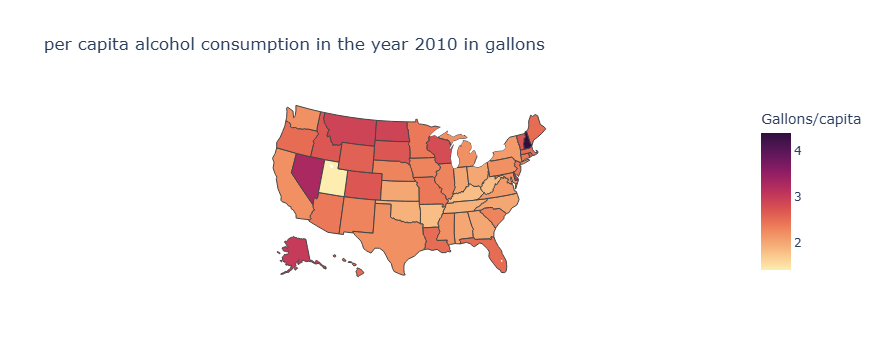

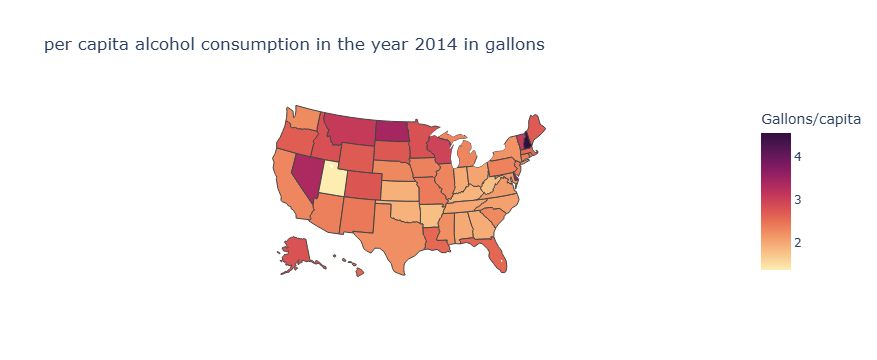

In [30]:
fig = px.choropleth(
    per_cap_alc_2010,
    locations="LocationAbbr",
    locationmode='USA-states',
    color= 'DataValue',
    color_continuous_scale='Matter',  
    scope='usa',
    hover_name="LocationDesc",
    labels = {'DataValue':'Gallons/capita'},
    title="per capita alcohol consumption in the year 2010 in gallons"
)

fig.show()

fig = px.choropleth(
    per_cap_alc_2014,
    locations="LocationAbbr",
    locationmode='USA-states',
    color= 'DataValue',
    color_continuous_scale='Matter',  
    scope='usa',
    hover_name="LocationDesc",
    labels = {'DataValue':'Gallons/capita'},
    title="per capita alcohol consumption in the year 2014 in gallons"
)

fig.show()

In [31]:
df_alc_change =merge_dfs_loc(per_cap_alc_2010,per_cap_alc_2014)
df_alc_in= set(df_alc_change.LocationAbbr[df_alc_change['DataValue_y']>df_alc_change['DataValue_x']])

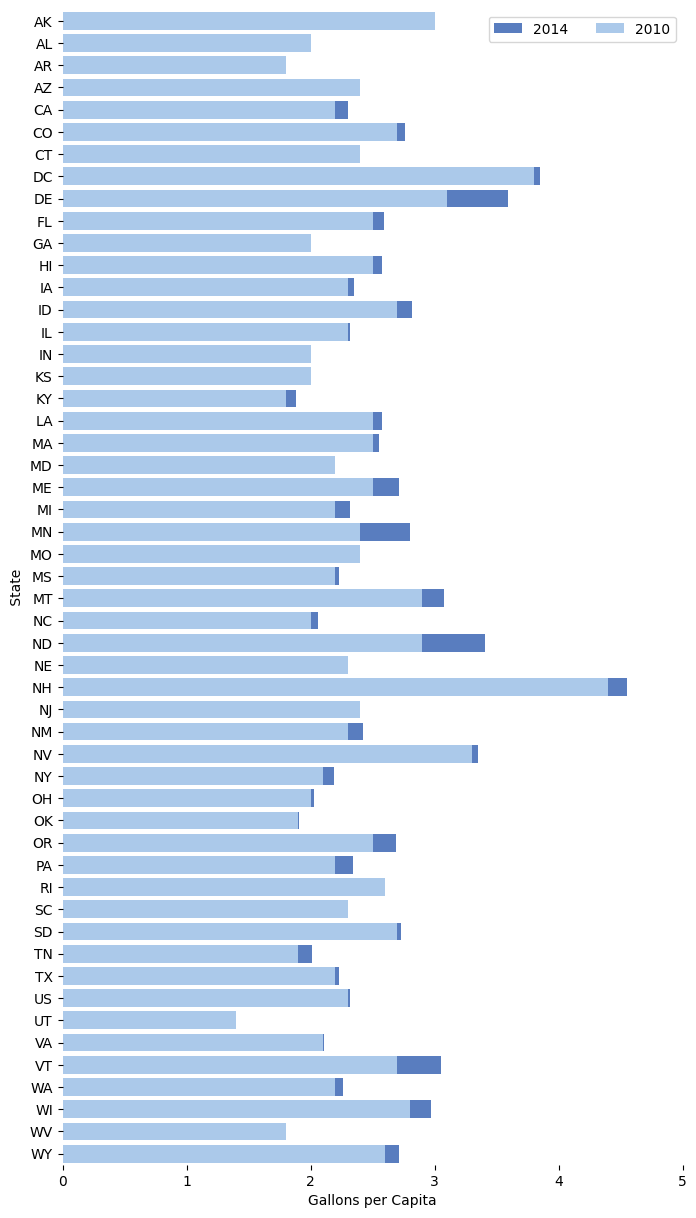

In [32]:
f, ax = plt.subplots(figsize=(8, 15))

sns.set_color_codes("muted")
sns.barplot(x="DataValue_y", y="LocationAbbr", data=df_alc_change,
            label="2014", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="DataValue_x", y="LocationAbbr", data=df_alc_change,
            label="2010", color="b")

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim =(0,5),ylabel=" State ",
       xlabel="Gallons per Capita")
sns.despine(left=True, bottom=True)

In [33]:
print(find_ques(['renal','kidney']))

['Prevalence of chronic kidney disease among adults aged >= 18 years', 'Incidence of treated end-stage renal disease', 'Incidence of treated end-stage renal disease attributed to diabetes', 'Mortality with end-stage renal disease']


In [34]:
df_kidney = df[df['Question']=='Prevalence of chronic kidney disease among adults aged >= 18 years']
df_kidney = df_kidney[(df_kidney['StratificationCategory1']=='Overall')& (df_kidney['DataValueType']=='Age-adjusted Prevalence')]
df_kidney['DataValue']=pd.to_numeric(df_kidney['DataValue'])
df_kidney_2011= df_kidney[df_kidney['YearStart']==2011]
df_kidney_2014= df_kidney[df_kidney['YearStart']==2014]

In [35]:
df_kidney_change = merge_dfs_loc(df_kidney_2011,df_kidney_2014)

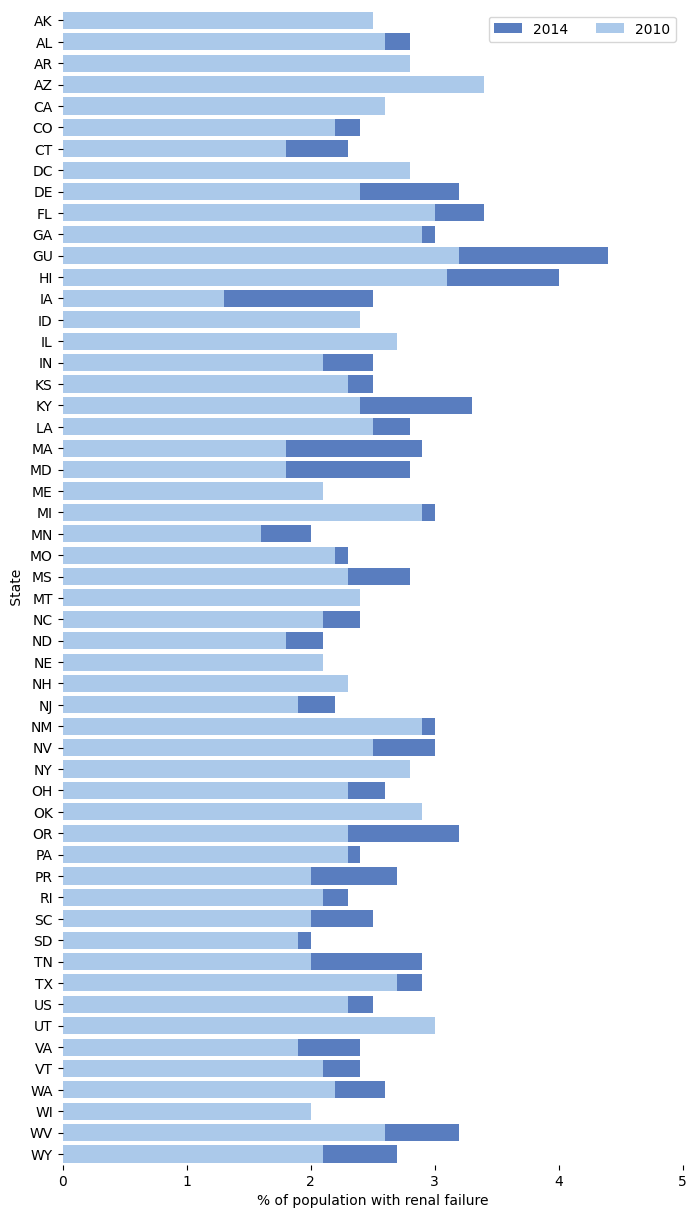

In [36]:
f, ax = plt.subplots(figsize=(8, 15))

sns.set_color_codes("muted")
sns.barplot(x="DataValue_y", y="LocationAbbr", data=df_kidney_change,
            label="2014", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="DataValue_x", y="LocationAbbr", data=df_kidney_change,
            label="2010", color="b")

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim =(0,5),ylabel=" State ",
       xlabel="% of population with renal failure")
sns.despine(left=True, bottom=True)

In [37]:
df_kidney_in= set(df_kidney_change.LocationAbbr[df_kidney_change['DataValue_y']>df_kidney_change['DataValue_x']])

x= df_kidney_in.intersection(df_alc_in)

In [38]:
d1 = df_kidney_change[['LocationAbbr','DataValue_x','DataValue_y']].reset_index().drop(columns='index')
d2 = df_alc_change[['LocationAbbr','DataValue_x','DataValue_y']].reset_index().drop(columns='index')
d = d1.merge(d2, left_on='LocationAbbr', right_on='LocationAbbr')
d = pd.concat([d[d['LocationAbbr']==i] for i in x])
d['inc_alc']=d['DataValue_y_x']-d['DataValue_x_x']
d['inc_kid']=d['DataValue_y_y']-d['DataValue_x_y'] 

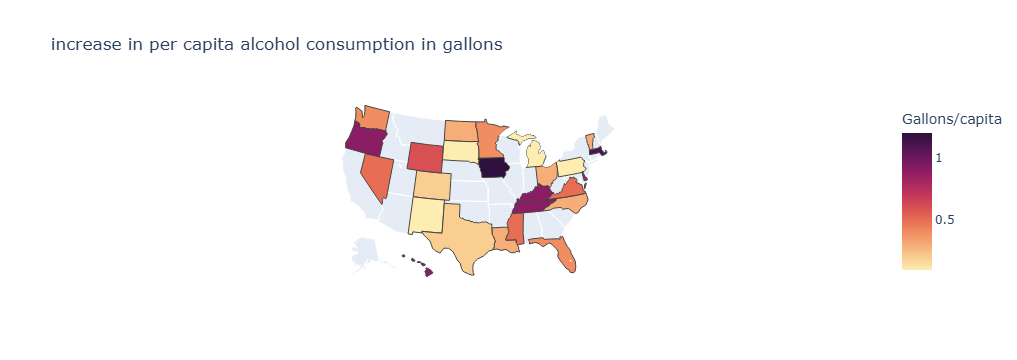

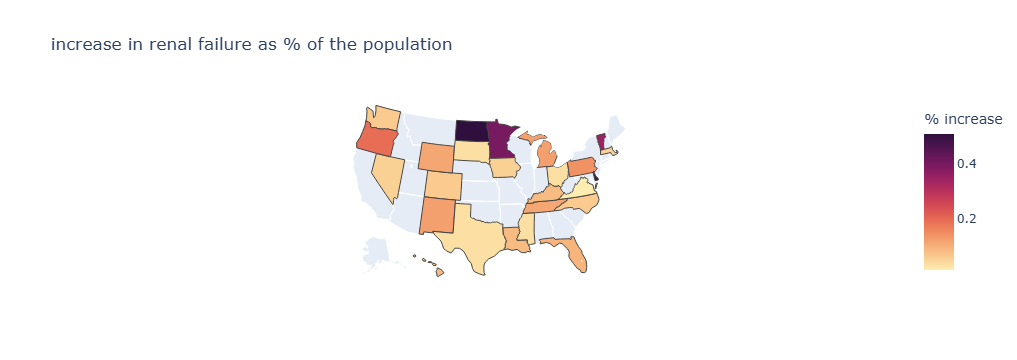

In [39]:
fig = px.choropleth(
    d,
    locations="LocationAbbr",
    locationmode='USA-states',
    color= 'inc_alc',
    color_continuous_scale='Matter',  
    scope='usa',
    hover_name="LocationAbbr",
    labels = {'inc_alc':'Gallons/capita'},
    title="increase in per capita alcohol consumption in gallons"
)

fig.show()

fig = px.choropleth(
    d,
    locations="LocationAbbr",
    locationmode='USA-states',
    color= 'inc_kid',
    color_continuous_scale='Matter',  
    scope='usa',
    hover_name="LocationAbbr",
    labels = {'inc_kid':'% increase'},
    title="increase in renal failure as % of the population "
)

fig.show()